In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn

In [ ]:
!pip install tensorflow
!pip install torch

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import torch

In [ ]:
Input_data = pd.read_csv("/content/drive/MyDrive/Final_E-clinic_dataset.csv")
Input_data

,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_BMI,Health Score
0,1,60,12,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,32.459031,90.952032
1,2,63,18,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,12.771246,92.561301
2,3,63,15,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,28.821069,94.023665
3,4,99,16,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,28.554611,88.459927
4,5,69,16,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,16.081438,94.544024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200015,200016,87,17,37.058905,95.357470,120,84,75,Male,63.496314,1.848268,18.587394,98.943557
200016,200017,76,16,36.463631,99.340786,131,89,76,Male,99.384322,1.988074,25.145064,94.683232
200017,200018,81,13,36.665477,98.120530,124,89,18,Female,71.771830,1.918059,19.508780,97.257285
200018,200019,83,13,37.019873,95.362426,125,86,66,Female,60.220388,1.861655,17.375810,95.453703


## Manual calculation of Health Score



```
# This is formatted as code
```



```

ideal_sbp = 120
ideal_dbp = 80
ideal_bmi = 21.7
ideal_sp02 = 95
ideal_heart_rate = 75
ideal_respiratory_rate = 16
ideal_body_temp = 36.75

total_ideal_weights = 1.0

def calculate_health_score(row):
    systolic_bp = row['Systolic Blood Pressure']
    diastolic_bp = row['Diastolic Blood Pressure']
    bmi = row['Derived_BMI']
    sp02 = row['Oxygen Saturation']
    heart_rate = row['Heart Rate']
    respiratory_rate = row['Respiratory Rate']
    body_temp = row['Body Temperature']



    if 110 <= systolic_bp <= 140:
        norm_deviation_sbp = 0
    else:
        norm_deviation_sbp = abs(systolic_bp - ideal_sbp) / ideal_sbp
    if 70 <= systolic_bp <= 90:
        norm_deviation_dbp = 0
    else:
        norm_deviation_dbp = abs(diastolic_bp - ideal_dbp) / ideal_dbp
    if 18.5 <= bmi <= 24.9:
        norm_deviation_bmi = 0
    else:
        norm_deviation_bmi = abs(bmi - ideal_bmi) / ideal_bmi
    if 36 <= body_temp <= 37.5:
        norm_deviation_body_temp = 0
    else:
        norm_deviation_body_temp = abs(body_temp - ideal_body_temp) / ideal_body_temp

    if 60 <= heart_rate <= 90:
        norm_deviation_heart_rate = 0
    else:
        norm_deviation_heart_rate = abs(heart_rate - ideal_heart_rate) / ideal_heart_rate

    if 12 <= respiratory_rate <= 20:
        norm_deviation_respiratory_rate = 0
    else:
        norm_deviation_respiratory_rate = abs(respiratory_rate - ideal_respiratory_rate) / ideal_respiratory_rate

    norm_deviation_sp02 = abs(sp02 - ideal_sp02) / ideal_sp02

    feature_score_sbp = max(0, 1 - norm_deviation_sbp)
    feature_score_dbp = max(0, 1 - norm_deviation_dbp)
    feature_score_bmi = max(0, 1 - norm_deviation_bmi)
    feature_score_sp02 = max(0, 1 - norm_deviation_sp02)
    feature_score_heart_rate = max(0, 1 - norm_deviation_heart_rate)
    feature_score_respiratory_rate = max(0, 1 - norm_deviation_respiratory_rate)
    feature_score_body_temp = max(0, 1 - norm_deviation_body_temp)

    total_weighted_score = (
        feature_score_sbp * 0.20 +
        feature_score_dbp * 0.20 +
        feature_score_bmi * 0.15 +
        feature_score_sp02 * 0.15 +
        feature_score_heart_rate * 0.15 +
        feature_score_respiratory_rate * 0.10 +
        feature_score_body_temp * 0.05
    )

    health_score = (total_weighted_score / total_ideal_weights) * 100

    return health_score

Input_data['Health Score'] = Input_data.apply(calculate_health_score, axis=1)

Input_data.to_csv('updated_E-clinic_with_health_scores.csv', index=False)

print(Input_data[['Health Score']])


## Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(Input_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print(f"Training Set: {train_data.shape}")
print(f"Validation Set: {val_data.shape}")
print(f"Test Set: {test_data.shape}")


Training Set: (128012, 13)
Validation Set: (32004, 13)
Test Set: (40004, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
            'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)']

scaler = StandardScaler()

train_data[features] = scaler.fit_transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])
test_data[features] = scaler.transform(test_data[features])


# Model Evaluation

## Neural Network



In [ ]:
X_train = train_data[features]
y_train = train_data['Health Score']

X_val = val_data[features]
y_val = val_data['Health Score']

from keras.models import Sequential
from keras.layers import Dense

NN_model = Sequential()
NN_model.add(Dense(64, input_dim=len(features), activation='relu'))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(16, activation='relu'))
NN_model.add(Dense(1, activation='linear'))

NN_model.compile(optimizer='adam', loss='mean_squared_error')

NN_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=256)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 3741.7139 - val_loss: 123.6165
Epoch 2/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 109.2628 - val_loss: 70.3638
Epoch 3/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53.5907 - val_loss: 14.8541
Epoch 4/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.2470 - val_loss: 3.0235
Epoch 5/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4014 - val_loss: 1.5009
Epoch 6/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3385 - val_loss: 1.0444
Epoch 7/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9550 - val_loss: 0.9847
Epoch 8/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7942 - val_loss: 0.7070
Epoch 9/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6607 - val_loss: 0.6146
Epoch 10/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5828 - val_loss: 0.5429
Epoch 11/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5331 - val_loss: 0.5371
Epoch 12/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:

val_predictions = NN_model.predict(X_val)

from sklearn.metrics import mean_squared_error
NN_val_mse = mean_squared_error(y_val, val_predictions)
print(f"Validation MSE (Neural Network): {NN_val_mse}")




1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Validation MSE (Neural Network): 0.15668867214074036


In [ ]:
X_test = test_data[features]
y_test = test_data['Health Score']

test_predictions = NN_model.predict(X_test)
NN_test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE: {NN_test_mse}")


1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test MSE: 0.1562583494700715


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train = train_data[features]
y_train = train_data['Health Score']
RF_model.fit(X_train, y_train)

X_val = val_data[features]
y_val = val_data['Health Score']
val_predictions = RF_model.predict(X_val)


from sklearn.metrics import mean_squared_error
RF_val_mse = mean_squared_error(y_val, val_predictions)
print(f"Validation MSE: {RF_val_mse}")


Validation MSE: 0.07796343033122129


In [ ]:
X_test = test_data[features]
y_test = test_data['Health Score']

test_predictions = RF_model.predict(X_test)
RF_test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE: {RF_test_mse}")


Test MSE: 0.07698076667551843


## XGBoost

In [ ]:

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error

X_train = train_data[features]
y_train = train_data['Health Score']
X_val = val_data[features]
y_val = val_data['Health Score']

XGB_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)


XGB_model.fit(X_train, y_train)


val_predictions_xgb = XGB_model.predict(X_val)
XGB_val_mse = mean_squared_error(y_val, val_predictions_xgb)
print(f"Validation MSE (XGBoost): {XGB_val_mse}")


Validation MSE (XGBoost): 0.08018179770000097


In [ ]:
X_test = test_data[features]
y_test = test_data['Health Score']
test_predictions_xgb = XGB_model.predict(X_test)
XGB_test_mse = mean_squared_error(y_test, test_predictions_xgb)
print(f"Test MSE (XGBoost): {XGB_test_mse}")

Test MSE (XGBoost): 0.07770146019492925


## Comparision Plot of all Algorithms

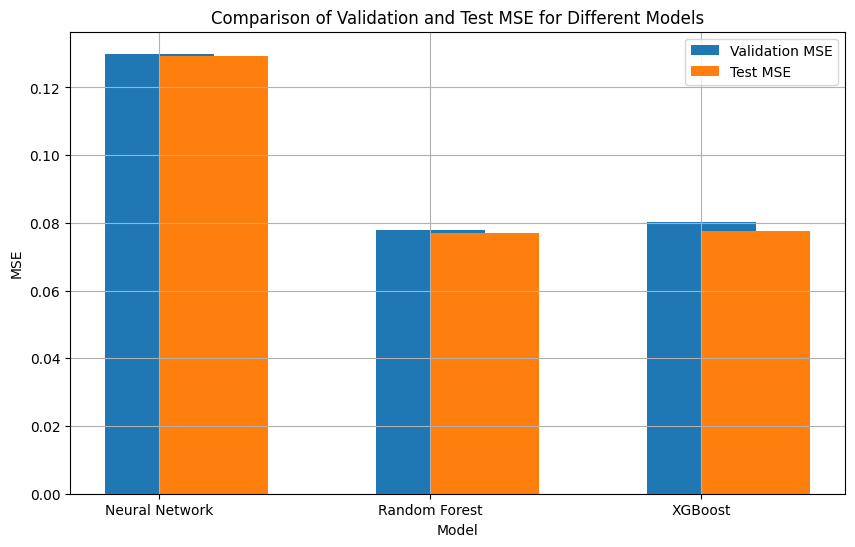

In [ ]:
models = ['Neural Network', 'Random Forest', 'XGBoost']
val_mse = [NN_val_mse, RF_val_mse, XGB_val_mse]
test_mse = [NN_test_mse, RF_test_mse, XGB_test_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, val_mse, width=0.4, label='Validation MSE', align='center')
plt.bar(models, test_mse, width=0.4, label='Test MSE', align='edge')

plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Comparison of Validation and Test MSE for Different Models')
plt.legend()
plt.grid(True)

plt.show()

## MODEL TESTING ON USER DATA

In [ ]:
new_user_data = {
    'Heart Rate': [89],
    'Respiratory Rate': [18],
    'Body Temperature': [37],
    'Oxygen Saturation': [97],
    'Systolic Blood Pressure': [127],
    'Diastolic Blood Pressure': [75],
    'Age': [20],
    'Weight (kg)': [80],
    'Height (m)': [1.84]
}

new_user_df = pd.DataFrame(new_user_data)

new_user_scaled = scaler.transform(new_user_df[features])

new_user_health_score = RF_model.predict(new_user_scaled)
print(f"Predicted Health Score for the new user: {new_user_health_score[0]}")


Predicted Health Score for the new user: 98.43678288549704


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
